In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Questions to answer: 
1. What's the breakdown of genres for the movies that were rated?
2. Which genres have the highest viewer satisfaction (highest ratings)? 
3. How does mean rating change across movie release years?
4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?

In [3]:
df = pd.read_csv("/workspaces/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/movie_ratings.csv")

In [4]:
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [5]:
df.shape

(212595, 13)

In [6]:
df.info

<bound method DataFrame.info of         user_id  movie_id  rating            timestamp  age gender  \
0           196       242       3  1997-12-04 15:55:49   49      M   
1           186       302       3  1998-04-04 19:22:22   39      F   
2           186       302       3  1998-04-04 19:22:22   39      F   
3           186       302       3  1998-04-04 19:22:22   39      F   
4           186       302       3  1998-04-04 19:22:22   39      F   
...         ...       ...     ...                  ...  ...    ...   
212590      716       204       5  1997-11-17 19:39:03   36      F   
212591      276      1090       1  1997-09-20 22:49:55   21      M   
212592       13       225       2  1997-12-17 22:52:36   47      M   
212593       13       225       2  1997-12-17 22:52:36   47      M   
212594       12       203       3  1997-11-19 17:13:03   28      F   

           occupation zip_code                      title    year  decade  \
0              writer    55105               Kolya

In [7]:
df.describe

<bound method NDFrame.describe of         user_id  movie_id  rating            timestamp  age gender  \
0           196       242       3  1997-12-04 15:55:49   49      M   
1           186       302       3  1998-04-04 19:22:22   39      F   
2           186       302       3  1998-04-04 19:22:22   39      F   
3           186       302       3  1998-04-04 19:22:22   39      F   
4           186       302       3  1998-04-04 19:22:22   39      F   
...         ...       ...     ...                  ...  ...    ...   
212590      716       204       5  1997-11-17 19:39:03   36      F   
212591      276      1090       1  1997-09-20 22:49:55   21      M   
212592       13       225       2  1997-12-17 22:52:36   47      M   
212593       13       225       2  1997-12-17 22:52:36   47      M   
212594       12       203       3  1997-11-19 17:13:03   28      F   

           occupation zip_code                      title    year  decade  \
0              writer    55105               Kol

In [ ]:
df.isnull().sum()
# Year and decade makes up most of the null values so it can be ignored

user_id         0
movie_id        0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip_code        0
title           0
year           36
decade         36
genres          0
rating_year     0
dtype: int64

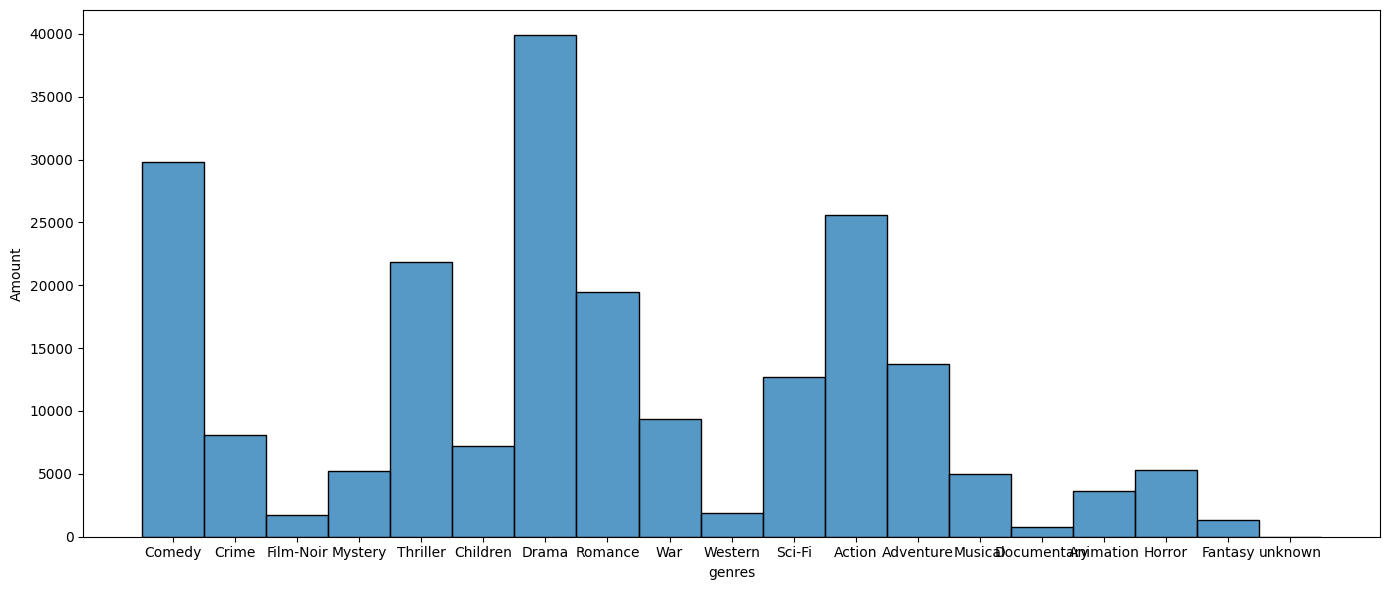

In [ ]:
#What's the breakdown of genres for the movies that were rated?
genre = df['genres'].value_counts() 
genre_df = genre 

genre_df.columns = ['genre', 'count']

plt.figure(figsize=(14,6)) 
sns.histplot(data=df, x="genres", discrete=True)

plt.tight_layout()
plt.ylabel('Amount')
plt.show()

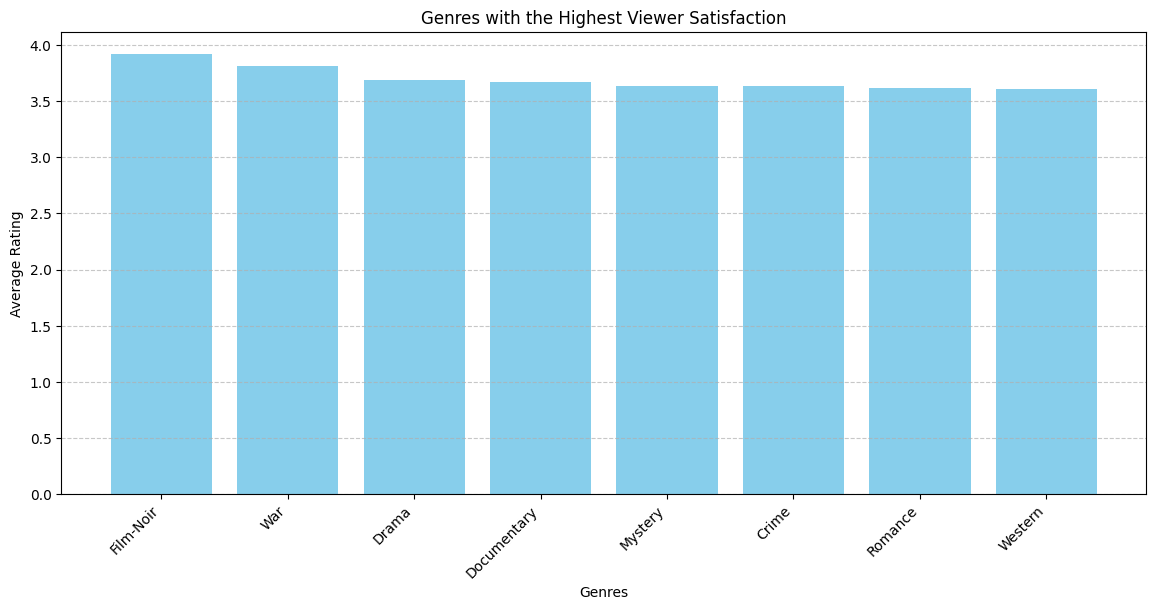

From this graph, we can conclude the top movie genres with high ratings are:
         genre  avg_rating
0    Film-Noir    3.921523
1          War    3.815812
2        Drama    3.687379
3  Documentary    3.672823
4      Mystery    3.638132
5        Crime    3.632278
6      Romance    3.621705
7      Western    3.613269


In [ ]:
#Which genres have the highest viewer satisfaction (highest ratings)? 
top_movies = df.groupby('genres')['rating'].mean().sort_values(ascending=False)
top_movies_df = top_movies.reset_index()
top_movies_df.columns = ['genre', 'avg_rating']

# Filter to show only high-rated genres
data = top_movies_df[top_movies_df['avg_rating'] >= 3.6]

# Plot
plt.figure(figsize=(14,6))
plt.bar(data['genre'], data['avg_rating'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title("Genres with the Highest Viewer Satisfaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"From this graph, we can conclude the top movie genres with high ratings are:\n{data}")

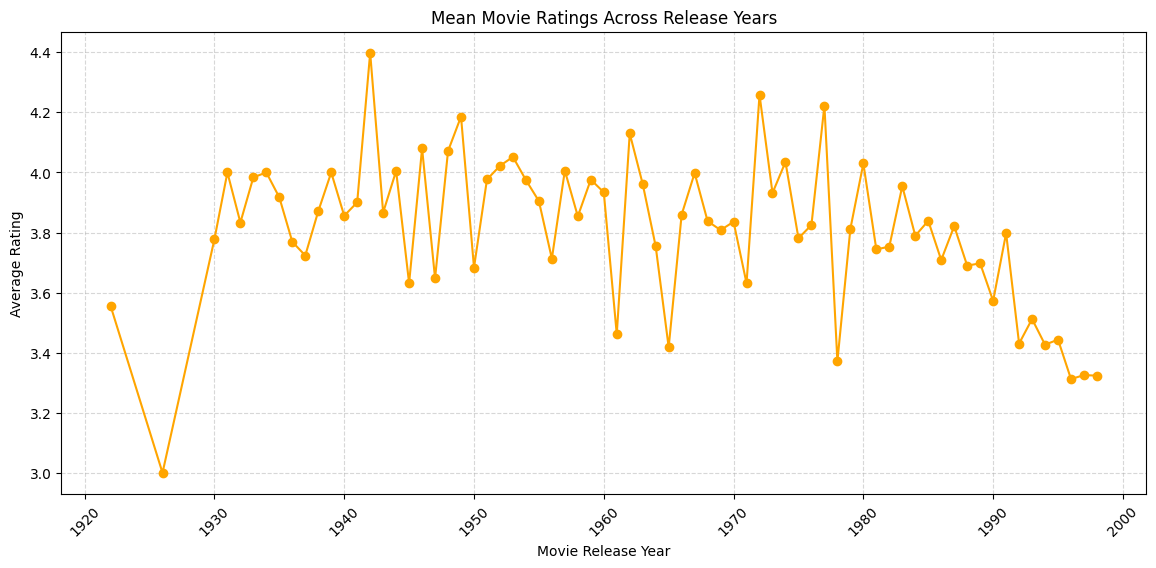

In [33]:
# How does mean rating change across movie release years?
year_ratings = df.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(14,6))
plt.plot(year_ratings['year'], year_ratings['rating'], marker='o', color='orange')
plt.xticks(rotation=45)
plt.xlabel('Movie Release Year')
plt.ylabel('Average Rating')
plt.title('Mean Movie Ratings Across Release Years')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

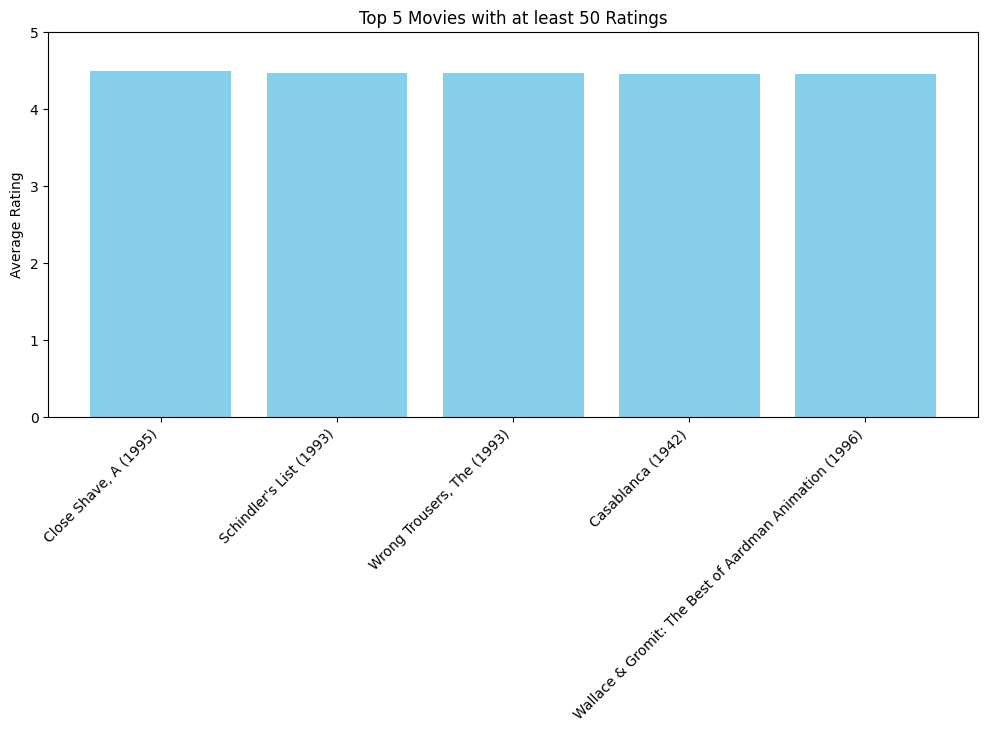

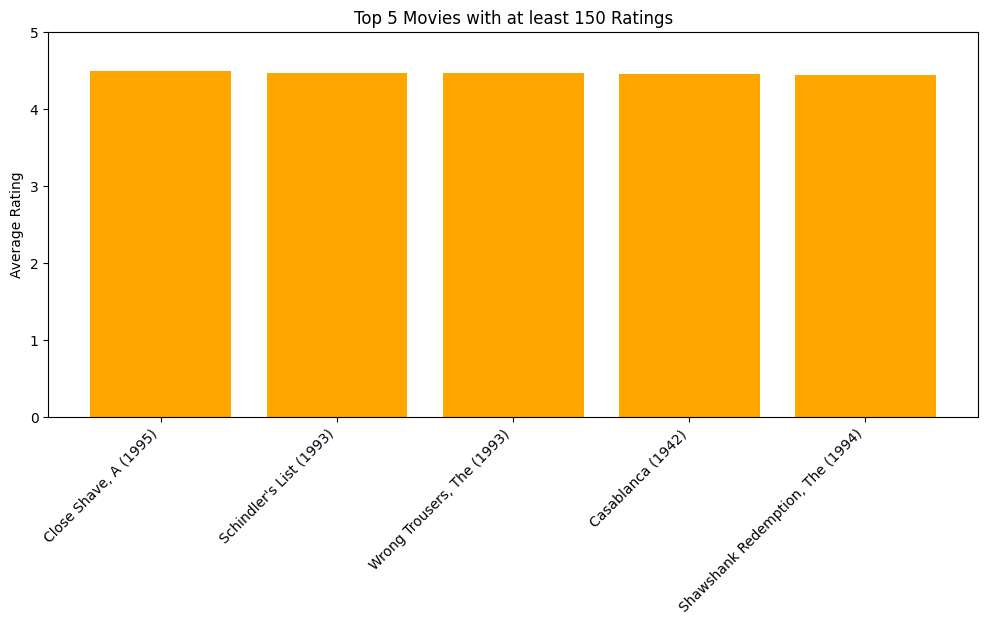

In [ ]:
#What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?

movie_stats = df.groupby('title')['rating'].agg(['count', 'mean']).reset_index()
movie_stats.columns = ['title', 'num_ratings', 'mean_rating']

# Top 5 movies with at least 50 ratings
top_50 = movie_stats[movie_stats['num_ratings'] >= 50].sort_values('mean_rating', ascending=False).head(5)

# Top 5 movies with at least 150 ratings
top_150 = movie_stats[movie_stats['num_ratings'] >= 150].sort_values('mean_rating', ascending=False).head(5)

# Visualization for 50+ ratings
plt.figure(figsize=(12,5))
plt.bar(top_50['title'], top_50['mean_rating'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Rating')
plt.title('Top 5 Movies with at least 50 Ratings')
plt.ylim(0,5)
plt.show()

# Visualization for 150+ ratings
plt.figure(figsize=(12,5))
plt.bar(top_150['title'], top_150['mean_rating'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Rating')
plt.title('Top 5 Movies with at least 150 Ratings')
plt.ylim(0,5)
plt.show()